# Activity: Build a Naive Bayes model 

## Introduction

In this activity, you will build your own Naive Bayes model. Naive Bayes models can be valuable to use any time you are doing work with predictions because they give you a way to account for new information. In today's world, where data is constantly evolving, modeling with Naive Bayes can help you adapt quickly and make more accurate predictions about what could occur.

For this activity, you work for a firm that provides insights for management and coaches in the National Basketball Association (NBA), a professional basketball league in North America. The league is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. In the previous activity, you analyzed a subset of data that contained information about the NBA players and their performance records. You conducted feature engineering to determine which features would most effectively predict a player's career duration. You will now use those insights to build a model that predicts whether a player will have an NBA career lasting five years or more. 

The data for this activity consists of performance statistics from each player's rookie year. There are 1,341 observations, and each observation in the data represents a different player in the NBA. Your target variable is a Boolean value that indicates whether a given player will last in the league for five years. Since you previously performed feature engineering on this data, it is now ready for modeling.   

## Step 1: Imports

### Import packages

Begin with your import statements. Of particular note here are `pandas` and from `sklearn`, `naive_bayes`, `model_selection`, and `metrics`.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load the dataset

Recall that in the lab about feature engineering, you outputted features for the NBA player dataset along with the target variable ``target_5yrs``. Data was imported as a DataFrame called `extracted_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('extracted_nba_players_data.csv')

### Display the data

Review the first 10 rows of data.

In [3]:
# Display the first 10 rows of the data
extracted_data.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


## Step 2: Model preparation

### Isolate your target and predictor variables
Separately define the target variable (`target_5yrs`) and the features.

In [4]:
# Define the y (target) variable.
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.
X = extracted_data.drop(columns=['target_5yrs'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into X and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, subset your DataFrame by using square brackets `[]` to specify which column(s) to select.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [5]:
# Display the first 10 rows of your target data.
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

**Question:** What do you observe about the your target variable?


The target variable (target_5yrs) will contain binary values: 0 or 1, where:

1 indicates the player has an NBA career lasting 5 years or more.

0 indicates the player has an NBA career lasting less than 5 years.

The first 10 values in the target column will help you understand the distribution of the players who made it past 5 years and those who didn't.

In [6]:
# Display the first 10 rows of your predictor variables.
X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


**Question:** What do you observe about the your predictor variables?

The predictor variables include a variety of statistics such as points scored, assists, rebounds, and field goal percentages.

These features will be used to predict whether the player will have a career lasting five years or more.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [7]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Perform the split operation on your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shape of the splits to confirm the split
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)

Training set features shape: (1005, 10)
Testing set features shape: (335, 10)
Training set target shape: (1005,)
Testing set target shape: (335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the function in the `model_selection` module of `sklearn` on the features and target variable, in order to perform the splitting.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `model_selection.train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`.

Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

### Print the shape of each output 

Print the shape of each output from your train-test split. This will verify that the split operated as expected.

In [8]:
# Print the shape of X_train
print("Shape of X_train:", X_train.shape)

# Print the shape of X_test
print("Shape of X_test:", X_test.shape)

# Print the shape of y_train
print("Shape of y_train:", y_train.shape)

# Print the shape of y_test
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1005, 10)
Shape of X_test: (335, 10)
Shape of y_train: (1005,)
Shape of y_test: (335,)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Call the attribute that DataFrames in `pandas` have to get the number of rows and number of columns as a tuple.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call the `shape` attribute.
</details>

**Question:** How many rows are in each of the outputs?


X_train has 1005 rows.

X_test has 335 rows.

y_train has 1005 rows.

y_test has 335 rows.

**Question:** What was the effect of the train-test split?


The train-test split divided the dataset into two parts: 75% for training the model and 25% for testing it. This ensures the model is trained on one portion of the data and evaluated on another, unseen portion, helping assess how well the model generalizes to new data.

## Step 3: Model building

**Question:** Which Naive Bayes algorithm should you use?

You should use the Gaussian Naive Bayes algorithm.

This is appropriate because:

You are performing binary classification (predicting whether a player’s career will last 5 years or not).

The model assumes that the features are continuous and normally distributed, which aligns with the characteristics of the data (e.g., percentages, averages, etc.).

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about different implementations of the Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/supplement/1zfDy/naive-bayes-classifiers) to determine which is appropriate in this situation.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that you are performing binary classification.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

You can identify the appropriate algorithm to use because you are performing a binary classification and assuming that the features of your model follow a normal distribution.
</details>

### Fit your model to your training data and predict on your test data

By creating your model, you will be drawing on your feature engineering work by training the classifier on the `X_train` DataFrame. You will use this to predict `target_5yrs` from `y_train`.

Start by defining `nb` to be the relevant algorithm from `sklearn`.`naive_bayes`. Then fit your model to your training data. Use this fitted model to create predictions for your test data.

In [9]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Fit the model on your training data.
nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".
y_pred = nb.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a Naive Bayes](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/VxbUT/construct-a-naive-bayes-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The appropriate implementation in this case is `naive_bayes`.`GaussianNB()`. Fit this model to your training data and predict on your test data.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `fit()`and pass your training feature set and target variable. Then call `predict()` on your test feature set.
</details>

## Step 4: Results and evaluation


### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print your accuracy score.
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print your precision score.
print("Precision score:", precision_score(y_test, y_pred))

# Print your recall score.
print("Recall score:", recall_score(y_test, y_pred))

# Print your f1 score.
print("F1 score:", f1_score(y_test, y_pred))

Accuracy score: 0.6537313432835821
Precision score: 0.8382352941176471
Recall score: 0.5480769230769231
F1 score: 0.6627906976744187


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/EITmV/key-evaluation-metrics-for-classification-models) for detail on these metrics.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `metrics` module in `sklearn` has a function for computing each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test`, and `y_pred` into each function.
</details>

**Question:** What is the accuracy score for your model, and what does this tell you about the success of the model's performance?



The accuracy score is 0.654, meaning the model correctly predicts whether an NBA player will last five years or more about 65% of the time. While this is better than random guessing, it's not necessarily a strong indicator of success on its own—especially if the dataset is imbalanced.

**Question:** Can you evaluate the success of your model by using the accuracy score exclusively?


No, relying solely on accuracy can be misleading, especially in cases of class imbalance. For instance, if most players in the dataset do not last five years, a model that predicts "no" for everyone could still have high accuracy but provide little real value. Therefore, precision, recall, and the F1 score should also be considered to understand the model’s true performance.

**Question:** What are the precision and recall scores for your model, and what do they mean? Is one of these scores more accurate than the other?


Precision is 0.838, indicating that when the model predicts a player will last five years, it's correct 83.8% of the time.

Recall is 0.548, meaning the model identifies only about 54.8% of all actual long-term players.

These metrics serve different purposes: precision tells us how accurate positive predictions are, while recall shows how well the model captures all actual positives. Neither is more “accurate”—they answer different questions, and which one is more important depends on the use case.

**Question:** What is the F1 score of your model, and what does this score mean?

The F1 score is 0.663, which is the harmonic mean of precision and recall. It gives a balanced measure of both metrics, especially useful when there's a trade-off between false positives and false negatives. A moderate F1 score like this indicates that while the model is fairly good at making correct predictions, there's room for improvement in capturing more actual positives without sacrificing precision.

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

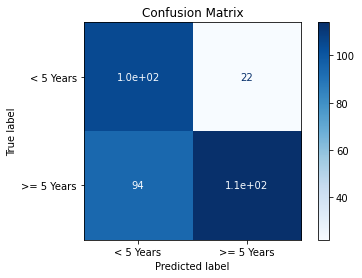

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Construct the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the display for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['< 5 Years', '>= 5 Years'])

# Plot the visual in-line
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

The `metrics` module has functions to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Then, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?


True Negatives (TN, <5 years predicted as <5 years) = 100

True Positives (TP, ≥5 years predicted as ≥5 years) = 110

False Positives (FP, <5 years predicted as ≥5 years) = 22

False Negatives (FN, ≥5 years predicted as <5 years) = 94

Observations:
The model is better at predicting players who last less than 5 years (100 correct predictions) than those who last at least 5 years (110 correct vs. 94 missed).

There’s a significant number of false negatives (94), meaning the model frequently misclassifies long-term players as short-term ones.

This correlates with your recall score (≈ 0.55), which measures the model’s ability to correctly identify long-term players—it's relatively low.

Your precision score is high (≈ 0.84), which means that when the model predicts a player will last at least 5 years, it's often correct. However, it misses many who should’ve been predicted that way.

Summary:
The confusion matrix supports the recall and precision scores observed earlier: the model is precise but lacks sensitivity in detecting long-term careers.

## Considerations

**What are some key takeaways that you learned from this lab?**

In this lab, I learned how to build and evaluate a Naive Bayes classifier using a real-world NBA dataset. Key steps included feature engineering, splitting data into training and test sets, and evaluating model performance with metrics like accuracy, precision, recall, and F1 score. One important insight was how a model can achieve high precision but still miss a large portion of positive cases, as shown by a low recall score. I also saw the importance of interpreting a confusion matrix to understand specific areas where the model performs well or poorly.

**How would you present your results to your team?**

I would start with a high-level overview of the model’s objective: predicting whether an NBA player’s career will last at least five years based on rookie performance stats. Then, I would present:

Model accuracy and how it compares to a baseline

Precision and recall scores, highlighting strengths and weaknesses

The confusion matrix for visual context

A discussion on the model's bias toward short-term career predictions
Lastly, I’d outline steps for improving the model, such as experimenting with additional features or tuning the classification threshold.

**How would you summarize your findings to stakeholders?**

I would explain that the model predicts with about 65% accuracy whether a player will have a long-term NBA career. It is highly reliable when it predicts a player will succeed, but it often underestimates players who actually do have long careers. This suggests that while the model is helpful for flagging strong candidates, it should be complemented with expert input or additional analysis to avoid overlooking potential talent. Next steps include improving the model’s ability to catch more long-term prospects without compromising reliability.